In [1]:
import pandas as pd
import os
import glob
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import r2_score

In [2]:
os.chdir(r'C:\Users\LILA\Desktop\RTT-FIngerprinting-with-offset\RTT-Fingerprinting with offset\Dataset\with_Offset')
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
df=combined_csv
df.drop(['AP1RSS','AP2RSS','AP3RSS','True_range1','True_range2','True_range3','x1','x2','x3','y1','y2','y3'],axis=1,inplace=True)
df

,AP1RTT,AP1STDEV,AP2RTT,AP2STDEV,AP3RTT,AP3STDEV,x,y
0,11.770082,0.145,6.115656,0.150,7.698439,0.372,1,1
1,11.283082,0.407,6.145656,0.267,7.659439,0.425,1,1
2,11.067082,0.245,6.428656,0.630,7.894439,0.414,1,1
3,10.130082,0.864,5.803656,0.210,8.401439,1.739,1,1
4,11.946082,0.252,6.194656,0.105,7.620439,0.513,1,1
...,...,...,...,...,...,...,...,...
659,1.468914,0.181,7.828640,0.321,6.049282,1.047,6,8
660,1.526914,0.136,7.984640,0.226,6.020282,1.098,6,8
661,1.429914,0.150,8.062640,0.234,6.078282,1.021,6,8
662,1.380914,0.206,8.101640,0.158,6.137282,1.027,6,8


In [3]:
# Group the data by 'x' and 'y', and calculate the minimum, maximum, 25th, 50th, and 75th percentiles for each column for local feature extractions
#grouped = df.groupby(['x', 'y']).agg(['min'])

# Add the mean or average value of each column to the grouped dataframe
grouped = df.groupby(['x', 'y']).mean()
#grouped = pd.concat([grouped, grouped_mean], axis=1)

# Rename the columns and reset the index
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
df = grouped.reset_index()
df

,x,y,A_P_1_R_T_T,A_P_1_S_T_D_E_V,A_P_2_R_T_T,A_P_2_S_T_D_E_V,A_P_3_R_T_T,A_P_3_S_T_D_E_V
0,1,1,10.000000,1.066333,6.082763,0.141504,8.062258,0.133744
1,1,2,9.219544,0.407708,6.324555,0.486028,7.071068,0.460747
2,1,3,8.485281,0.322244,6.708204,0.787931,6.082763,0.404662
3,1,7,6.324555,0.888978,9.219544,0.873201,2.236068,0.148901
4,1,8,6.082763,0.473028,10.000000,0.330619,1.414214,0.981901
5,2,1,9.433981,0.714262,5.099020,1.246364,8.246211,0.609167
6,2,2,8.602325,0.822399,5.385165,0.216622,7.280110,0.924308
7,2,3,7.810250,0.650289,5.830952,1.513773,6.324555,1.536497
8,2,7,5.385165,0.627516,8.602325,0.727868,2.828427,0.202878
9,2,8,5.099020,0.458550,9.433981,0.145792,2.236068,1.399032


In [4]:
new_name={
          'A_P_1_R_T_T':'AP1RTT_MEAN','A_P_2_R_T_T':'AP2RTT_MEAN','A_P_3_R_T_T':'AP3RTT_MEAN',
          'A_P_1_R_S_S':'AP1RSS_MEAN', 'A_P_2_R_S_S':'AP2RSS_MEAN', 'A_P_3_R_S_S':'AP3RSS_MEAN',
          'A_P_1_S_T_D_E_V':'AP1STDEV_MEAN','A_P_2_S_T_D_E_V':'AP2STDEV_MEAN','A_P_3_S_T_D_E_V':'AP3STDEV_MEAN'}
df.rename(columns=new_name,inplace=True)
df


,x,y,AP1RTT_MEAN,AP1STDEV_MEAN,AP2RTT_MEAN,AP2STDEV_MEAN,AP3RTT_MEAN,AP3STDEV_MEAN
0,1,1,10.000000,1.066333,6.082763,0.141504,8.062258,0.133744
1,1,2,9.219544,0.407708,6.324555,0.486028,7.071068,0.460747
2,1,3,8.485281,0.322244,6.708204,0.787931,6.082763,0.404662
3,1,7,6.324555,0.888978,9.219544,0.873201,2.236068,0.148901
4,1,8,6.082763,0.473028,10.000000,0.330619,1.414214,0.981901
5,2,1,9.433981,0.714262,5.099020,1.246364,8.246211,0.609167
6,2,2,8.602325,0.822399,5.385165,0.216622,7.280110,0.924308
7,2,3,7.810250,0.650289,5.830952,1.513773,6.324555,1.536497
8,2,7,5.385165,0.627516,8.602325,0.727868,2.828427,0.202878
9,2,8,5.099020,0.458550,9.433981,0.145792,2.236068,1.399032


In [5]:
input_data=df.iloc[:,2:] 
output_data = df.iloc[:, :2]
input_data=np.array(input_data.values)
output_data=np.array(output_data.values)

In [6]:
X=input_data
y=output_data
print(output_data.shape)
print(input_data.shape)

(39, 2)
(39, 6)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(y_test, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,RF_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, RF_pred)*100))

Best Hyperparameters: {'max_depth': 6, 'n_estimators': 200}
Mean Squared Error in meter: 1.268
Root Mean Squared Error (RMSE) on new data in meter: 1.126
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 23.012
R2 score is in percent: 70.01


In [10]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train,y_train)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse)) 

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,knn_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, knn_pred)*100))

Best K value found by grid search: 5
Mean Squared Error (MSE) on new data in m: 1.98
Root Mean Squared Error (RMSE) on new data in m: 1.41
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 29.309
R2 score is in percent: 46.89


In [11]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

# Define the model architecture
def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(units=hp.Int('units_1', min_value=32, max_value=512, step=16), input_shape=(6,), activation='relu'))
    model.add(keras.layers.Dropout(hp.Float('dropout_1', min_value=0.0, max_value=0.5, step=0.1)))
    
    for i in range(hp.Int('num_hidden_layers', 1, 10)):
        model.add(keras.layers.Dense(units=hp.Int('units_' + str(i+2), min_value=32, max_value=512, step=16),
                                 activation=hp.Choice('activation_' + str(i+2), values=['relu','sigmoid','tanh'])))
        model.add(keras.layers.Dropout(hp.Float('dropout_' + str(i+2), min_value=0.0, max_value=0.5, step=0.1)))
    
        
    model.add(keras.layers.Dense(units=2, activation='linear'))
    
    
    model.compile(optimizer=keras.optimizers.Adam(
                        hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),

                  loss='mean_squared_error',
                  metrics=['mse'])
    return model

In [12]:
# Define the search space

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20,
    executions_per_trial=3,
    directory='test_raw',
    project_name='RTT_Data_raw')

INFO:tensorflow:Reloading Tuner from test_raw\RTT_Data_raw\tuner0.json


In [13]:
# Search for the best hyperparameters
tuner.search(X_train, y_train,
             epochs=200,
           validation_data=(X_test,y_test) ,
             callbacks=[keras.callbacks.EarlyStopping(patience=5)])

INFO:tensorflow:Oracle triggered exit


In [14]:
tuner.results_summary()

Results summary
Results in test_raw\RTT_Data_raw
Showing 10 best trials
Trial summary
Hyperparameters:
units_1: 256
dropout_1: 0.30000000000000004
num_hidden_layers: 4
units_2: 112
activation_2: relu
dropout_2: 0.4
learning_rate: 0.001
units_3: 112
activation_3: tanh
dropout_3: 0.30000000000000004
units_4: 48
activation_4: tanh
dropout_4: 0.30000000000000004
units_5: 32
activation_5: relu
dropout_5: 0.0
Score: 1.9503090778986614
Trial summary
Hyperparameters:
units_1: 432
dropout_1: 0.1
num_hidden_layers: 8
units_2: 96
activation_2: tanh
dropout_2: 0.2
learning_rate: 0.0001
units_3: 336
activation_3: tanh
dropout_3: 0.2
units_4: 240
activation_4: tanh
dropout_4: 0.2
units_5: 352
activation_5: tanh
dropout_5: 0.1
units_6: 80
activation_6: sigmoid
dropout_6: 0.4
units_7: 448
activation_7: tanh
dropout_7: 0.0
units_8: 512
activation_8: relu
dropout_8: 0.4
units_9: 112
activation_9: tanh
dropout_9: 0.2
units_10: 112
activation_10: tanh
dropout_10: 0.30000000000000004
units_11: 416
activati

In [15]:
best_hps=tuner.get_best_hyperparameters()[0]

dnn_model = tuner.hypermodel.build(best_hps)
#best_model = tuner.get_best_models()[0]
from keras.callbacks import EarlyStopping

n_epochs=500
#history = model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_split=0.2,callbacks=callbacks_list)
#history = model.fit(X_train, y_train, epochs=n_epochs, bbatch_size=32, validation_split=0.2,callbacks=callbacks_list)
history = dnn_model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_data=(X_test,y_test),callbacks=[keras.callbacks.EarlyStopping(patience=20)])

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 19.2254 - mse: 19.2254 - val_loss: 24.4888 - val_mse: 24.4888
Epoch 2/500
1/1 [==============================] - 0s 21ms/step - loss: 18.2433 - mse: 18.2433 - val_loss: 23.8463 - val_mse: 23.8463
Epoch 3/500
1/1 [==============================] - 0s 19ms/step - loss: 17.7606 - mse: 17.7606 - val_loss: 23.1206 - val_mse: 23.1206
Epoch 4/500
1/1 [==============================] - 0s 18ms/step - loss: 17.1886 - mse: 17.1886 - val_loss: 22.2976 - val_mse: 22.2976
Epoch 5/500
1/1 [==============================] - 0s 19ms/step - loss: 16.9607 - mse: 16.9607 - val_loss: 21.3052 - val_mse: 21.3052
Epoch 6/500
1/1 [==============================] - 0s 18ms/step - loss: 16.0644 - mse: 16.0644 - val_loss: 20.1848 - val_mse: 20.1848
Epoch 7/500
1/1 [==============================] - 0s 19ms/step - loss: 15.6792 - mse: 15.6792 - val_loss: 18.9858 - val_mse: 18.9858
Epoch 8/500
1/1 [==============================] - 0s 18ms/step 

In [16]:
# Evaluate the model on the test set
test_loss, test_mse = dnn_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 14ms/step - loss: 0.8344 - mse: 0.8344


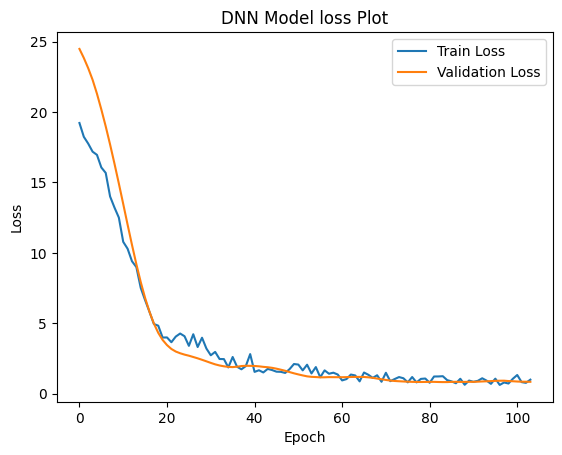

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Model loss Plot')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='upper right')
plt.show()

In [18]:
y_pred=dnn_model.predict(X_test)
y_pred

1/1 [==============================] - 0s 82ms/step


array([[5.393659  , 1.8415992 ],
       [6.0461926 , 5.4575963 ],
       [2.2904673 , 7.133886  ],
       [3.6960454 , 2.6101494 ],
       [5.213753  , 7.0644197 ],
       [4.219675  , 1.5296133 ],
       [1.7134476 , 0.66453147],
       [4.7399096 , 3.4945433 ],
       [5.6570425 , 1.8567057 ],
       [2.7208352 , 5.444475  ],
       [3.2415729 , 7.4995437 ],
       [2.4423175 , 6.886053  ]], dtype=float32)

In [19]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test,y_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, y_pred)*100))

Mean Squared Error (MSE) on new data in m: 0.83
Root Mean Squared Error (RMSE) on new data in m: 0.91
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 22.63
R2 score is in percent: 79.38


In [20]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import GridSearchCV
# from math import sqrt
# # Define the model
# model = RandomForestRegressor(random_state=42)

# # Define the hyperparameters to search over
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [2, 4, 6, 8]
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(y_pred, y_test)
# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

# # Predict on new data with the best model
# best_model = grid_search.best_estimator_
# RF_pred = best_model.predict(y_pred)

# # Calculate the mean squared error
# mse = mean_squared_error(y_test, RF_pred)
# print("Mean Squared Error in meter: {:.3f}" .format(mse))

# rmse=sqrt(mean_squared_error(y_test, RF_pred)) 
# print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

# from sklearn.metrics import mean_absolute_percentage_error
# print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.3f}'.format(mean_absolute_percentage_error(y_test,RF_pred)*100))

# print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, RF_pred)*100))

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from math import sqrt
import pandas as pd

# Define the model
model = RandomForestRegressor(random_state=42)

# Define the hyperparameters to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [2, 4, 6, 8]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(y_pred, y_test)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Predict on new data with the best model
best_model = grid_search.best_estimator_
RF_pred = best_model.predict(y_pred)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, RF_pred)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_test, RF_pred) * 100
r2 = r2_score(y_test, RF_pred) * 100

# Store the results in a dictionary
results = {'n_estimators': [], 'max_depth': [], 'MSE': [], 'RMSE': [], 'MAPE': [], 'R2': []}

# Loop over the different values of n_estimators and max_depth
for n in param_grid['n_estimators']:
    for depth in param_grid['max_depth']:
        # Define the model with the current hyperparameters
        model = RandomForestRegressor(n_estimators=n, max_depth=depth, random_state=42)

        # Fit the model to the training data
        model.fit(y_pred, y_test)

        # Get the predictions using the trained model
        RF_pred = model.predict(y_pred)

        # Calculate the evaluation metrics
        mse = mean_squared_error(y_test, RF_pred)
        rmse = sqrt(mse)
        mape = mean_absolute_percentage_error(y_test, RF_pred) * 100
        r2 = r2_score(y_test, RF_pred) * 100

        # Store the results in the dictionary
        results['n_estimators'].append(n)
        results['max_depth'].append(depth)
        results['MSE'].append(mse)
        results['RMSE'].append(rmse)
        results['MAPE'].append(mape)
        results['R2'].append(r2)

# Print the results as a pandas dataframe
results_RF_df = pd.DataFrame(results)
print(results_RF_df)


Best Hyperparameters: {'max_depth': 4, 'n_estimators': 50}
    n_estimators  max_depth       MSE      RMSE       MAPE         R2
0             50          2  0.502676  0.708996  20.067437  85.791459
1             50          4  0.197342  0.444232  10.739575  94.225622
2             50          6  0.194000  0.440454  10.511210  94.380744
3             50          8  0.194000  0.440454  10.511210  94.380744
4            100          2  0.475454  0.689532  19.373835  86.510655
5            100          4  0.181129  0.425592  10.498161  94.787984
6            100          6  0.178937  0.423010  10.334821  94.874040
7            100          8  0.178937  0.423010  10.334821  94.874040
8            200          2  0.465630  0.682371  19.617774  86.494272
9            200          4  0.174441  0.417661  11.118748  94.882827
10           200          6  0.169869  0.412151  10.872768  95.024015
11           200          8  0.169869  0.412151  10.872768  95.024015


In [22]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for the grid search
# param_grid = {'n_neighbors': [3,5,7,9]}

# # Create a KNN model
# knn_model = KNeighborsRegressor()

# # Perform a grid search using cross-validation
# grid_search = GridSearchCV(knn_model, param_grid, cv=5)
# grid_search.fit(y_pred, y_test)

# # Print the best parameter value found by the grid search
# print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# # Get the predictions using the best K value
# best_knn_model = grid_search.best_estimator_
# knn_pred = best_knn_model.predict(y_pred)

# # Calculate the evaluation metrics
# mse = mean_squared_error(y_test, knn_pred)
# print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
# rmse=sqrt(mean_squared_error(y_test, knn_pred)) 
# print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))
# from sklearn.metrics import mean_absolute_percentage_error
# print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(y_test,knn_pred)*100))

# print('R2 score is in percent: {:.2f}'.format(r2_score(y_test, knn_pred)*100))

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from math import sqrt
import pandas as pd

# Define the parameter grid for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9]}

# Create a KNN model
knn_model = KNeighborsRegressor()

# Perform a grid search using cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(y_pred, y_test)

# Print the best parameter value found by the grid search
print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# Get the predictions using the best K value
best_knn_model = grid_search.best_estimator_
knn_pred = best_knn_model.predict(y_pred)

# Calculate the evaluation metrics for the best K value
mse = mean_squared_error(y_test, knn_pred)
rmse = sqrt(mse)
mape = mean_absolute_percentage_error(y_test, knn_pred) * 100
r2 = r2_score(y_test, knn_pred)

# Store the results in a dictionary
results = {'k': [grid_search.best_params_['n_neighbors']], 'MSE': [mse], 'RMSE': [rmse], 'MAPE': [mape], 'R2': [r2]}

# Loop over the different values of K
for k in param_grid['n_neighbors']:
    # Set the K parameter of the KNN model
    knn_model.set_params(n_neighbors=k)

    # Fit the KNN model to the training data
    knn_model.fit(y_pred, y_test)

    # Get the predictions using the trained KNN model
    knn_pred = knn_model.predict(y_pred)

    # Calculate the evaluation metrics
    mse = mean_squared_error(y_test, knn_pred)
    rmse = sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, knn_pred) * 100
    r2 = r2_score(y_test, knn_pred)

    # Store the results in the dictionary
    results['k'].append(k)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['MAPE'].append(mape)
    results['R2'].append(r2)

# Print the results as a pandas dataframe
results_KNN_df = pd.DataFrame(results)
print(results_KNN_df)


Best K value found by grid search: 3
   k       MSE      RMSE       MAPE        R2
0  3  0.587963  0.766787  22.017196  0.820130
1  3  0.587963  0.766787  22.017196  0.820130
2  5  1.131667  1.063798  30.981151  0.629399
3  7  1.404762  1.185227  37.406463  0.548082
4  9  2.047325  1.430848  43.707562  0.394386


In [24]:
from tensorflow.keras.models import load_model

dnn_model.save('my_DNN_Regrr_model_xy_no_feature_extraction.h5')


In [25]:
loaded_model = load_model('my_DNN_Regrr_model_xy_no_feature_extraction.h5')
loaded_model

In [26]:
# Get the weights and biases for each layer
for layer in loaded_model.layers:
    if layer.weights:
        weights, biases = layer.get_weights()
        print(layer.name)
        print('Weights:')
        print(weights)
        print('Biases:')
        print(biases)
    else:
        print(layer.name + ' has no weights or biases.')


dense
Weights:
[[ 0.07708254 -0.02289191 -0.1147036  ... -0.07711601  0.14919554
   0.00307023]
 [-0.02012099  0.13317758 -0.03678603 ...  0.07712976 -0.03366154
  -0.10174809]
 [ 0.09299778 -0.15347983 -0.04907569 ...  0.0424609  -0.00945746
   0.01354055]
 [-0.05990985  0.09176971 -0.07736509 ...  0.06344141  0.1020029
  -0.06273   ]
 [ 0.13356653  0.06673735  0.1242717  ...  0.12717322 -0.05339601
  -0.08456917]
 [ 0.00185764 -0.07695352 -0.0401297  ... -0.00854878  0.008757
  -0.00783587]]
Biases:
[-0.00490315  0.00057183 -0.01454916  0.01558347 -0.00485588 -0.00861564
 -0.00343925  0.00146157 -0.01237283  0.0100803  -0.01146511 -0.02296929
  0.01993164  0.01442041 -0.02359547  0.01833816 -0.0226244  -0.02128388
  0.00892167  0.00837837 -0.01426471  0.01857789  0.02659167 -0.01618778
  0.00827144 -0.00403001  0.00131374  0.00015813  0.02089054  0.0236033
  0.00892882 -0.01430056  0.02105865  0.01656952 -0.01199774  0.0079349
  0.00835461  0.01263487  0.00283691 -0.00740631 -0.00198

In [34]:
# dfff=pd.read_csv('D:/testt.csv')
#data_folder = r'C:\Users\LILA\Desktop\RTT-FIngerprinting-with-offset\RTT-Fingerprinting with offset\Dataset\Test_dataset\With_offset'
data_folder = r'C:\Users\LILA\Desktop\RTT-FIngerprinting-with-offset\RTT-Fingerprinting with offset\Dataset\Random_test_data\offset'
os.chdir(data_folder)
extension='csv'

all_filenames=[i for i in glob.glob('*.{}'.format(extension))]

combined_csv=pd.concat([pd.read_csv(f) for f in all_filenames])
dfff=combined_csv
dfff.drop(['AP1RSS','AP2RSS','AP3RSS','True_range1','True_range2','True_range3','x1','x2','x3','y1','y2','y3'],axis=1,inplace=True)
dfff

,AP1RTT,AP1STDEV,AP2RTT,AP2STDEV,AP3RTT,AP3STDEV,x,y
0,8.347618,2.193,6.104788,0.662,6.443809,0.207,1.0,2.5
1,11.004618,0.208,5.987788,0.584,6.766809,0.062,1.0,2.5
2,8.113618,0.823,5.831788,1.275,6.649809,0.158,1.0,2.5
3,9.012618,0.871,5.987788,0.866,6.941809,0.067,1.0,2.5
4,8.699618,1.097,6.143788,0.662,6.678809,0.088,1.0,2.5
...,...,...,...,...,...,...,...,...
173,5.565225,0.258,3.762089,2.050,7.818045,0.176,5.5,3.5
174,5.858225,0.138,3.801089,2.264,7.935045,0.152,5.5,3.5
175,5.840225,0.104,3.880089,1.875,7.779045,0.201,5.5,3.5
176,6.024225,0.084,3.840089,1.997,7.779045,0.201,5.5,3.5


In [35]:
# Add the mean or average value of each column to the grouped dataframe
grouped = dfff.groupby(['x', 'y']).mean()
#grouped = pd.concat([grouped, grouped_mean], axis=1)

# Rename the columns and reset the index
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
dffff = grouped.reset_index()

In [36]:
new_name={
          'A_P_1_R_T_T':'AP1RTT_MEAN','A_P_2_R_T_T':'AP2RTT_MEAN','A_P_3_R_T_T':'AP3RTT_MEAN',
          'A_P_1_R_S_S':'AP1RSS_MEAN', 'A_P_2_R_S_S':'AP2RSS_MEAN', 'A_P_3_R_S_S':'AP3RSS_MEAN',
          'A_P_1_S_T_D_E_V':'AP1STDEV_MEAN','A_P_2_S_T_D_E_V':'AP2STDEV_MEAN','A_P_3_S_T_D_E_V':'AP3STDEV_MEAN'}
dffff.rename(columns=new_name,inplace=True)
dffff

,x,y,AP1RTT_MEAN,AP1STDEV_MEAN,AP2RTT_MEAN,AP2STDEV_MEAN,AP3RTT_MEAN,AP3STDEV_MEAN
0,1.0,2.5,8.845903,1.317460,6.500000,0.874270,6.576473,0.165723
1,1.5,2.0,8.902247,0.833757,5.852350,0.898500,7.158911,1.645309
2,1.5,7.5,5.700877,1.438594,9.300538,1.129444,2.121320,0.167319
3,2.0,2.5,8.200610,0.667889,5.590170,0.312556,6.800735,1.567792
4,2.5,2.5,7.905694,1.360250,5.147815,0.428071,6.964194,0.431333
5,2.5,7.5,4.743416,0.346784,8.746428,0.750458,2.915476,0.121922
6,3.0,1.5,8.500000,1.316752,4.272002,1.199183,8.077747,0.816902
7,3.0,5.5,5.315073,1.276392,6.800735,0.366248,4.609772,0.921190
8,3.0,7.5,4.272002,1.306385,8.500000,0.348223,3.354102,0.203047
9,3.5,3.5,6.519202,0.344486,4.949747,0.133959,6.519202,0.584236


In [37]:
input_data=dffff.iloc[:,2:] 
output_data = dffff.iloc[:, :2]
input_data=np.array(input_data.values)
output_data=np.array(output_data.values)

# input_data=dfff.iloc[:,:6] 
# output_data = dfff.iloc[:, 6:]
# input_data=np.array(input_data.values)
# output_data=np.array(output_data.values)
print(input_data)
print(output_data)

[[8.84590301 1.31745985 6.5        0.87427007 6.57647322 0.16572263]
 [8.90224691 0.83375735 5.85234996 0.8985     7.15891053 1.64530882]
 [5.70087713 1.43859375 9.30053762 1.12944375 2.12132034 0.16731875]
 [8.20060973 0.66788889 5.59016994 0.31255556 6.80073525 1.56779167]
 [7.90569415 1.36025    5.14781507 0.42807051 6.96419414 0.43133333]
 [4.74341649 0.34678431 8.74642784 0.75045752 2.91547595 0.12192157]
 [8.5        1.31675163 4.27200187 1.19918301 8.07774721 0.81690196]
 [5.31507291 1.27639216 6.80073525 0.36624837 4.60977223 0.92118954]
 [4.27200187 1.30638514 8.5        0.34822297 3.35410197 0.2030473 ]
 [6.51920241 0.34448649 4.94974747 0.13395946 6.51920241 0.58423649]
 [5.70087713 0.566      5.70087713 0.50994595 5.70087713 0.38548649]
 [6.26498204 0.37431868 4.60977223 0.15535165 6.80073525 0.73954945]
 [7.43303437 0.98237162 3.20156212 0.27565541 8.32165849 0.88569595]
 [2.6925824  1.64694737 8.38152731 0.17826316 4.60977223 1.18791729]
 [4.03112887 1.18753383 5.85234996

In [38]:
XX=input_data
yy=output_data
print(output_data.shape)
print(input_data.shape)

(18, 2)
(18, 6)


In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
XX= sc.fit_transform(XX)

In [40]:
y_predd=loaded_model.predict(XX)
y_predd

1/1 [==============================] - 0s 44ms/step


array([[1.0003638 , 1.0757601 ],
       [2.8527915 , 1.6688442 ],
       [2.8825116 , 7.676238  ],
       [3.7870867 , 2.5972853 ],
       [2.3012903 , 0.87919694],
       [3.0432673 , 7.7559285 ],
       [3.5121775 , 0.86099297],
       [3.7256107 , 6.2118373 ],
       [3.5168715 , 7.774483  ],
       [4.469978  , 3.2341676 ],
       [3.538867  , 4.294001  ],
       [5.0522065 , 3.0363376 ],
       [5.146272  , 1.6123387 ],
       [4.998579  , 7.2770166 ],
       [5.305347  , 5.4100947 ],
       [4.7113566 , 7.4706492 ],
       [5.5329485 , 1.6581136 ],
       [5.4037895 , 2.4127529 ]], dtype=float32)

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(yy, y_predd)
print('Mean Squared Error (MSE) on new data in mm: {:.2f}'.format(mse))

rmse=sqrt(mean_squared_error(yy, y_predd)) 
print('Root Mean Squared Error (RMSE) on new data in mm: {:.2f}'.format(rmse))
from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,y_predd)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy, y_predd)*100))

Mean Squared Error (MSE) on new data in mm: 0.54
Root Mean Squared Error (RMSE) on new data in mm: 0.73
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 21.09
R2 score is in percent: 79.15


In [42]:
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(y_predd, columns=['predicted_x','predicted_y'])
df_finall_dnn = pd.DataFrame()
df_finall_dnn = pd.concat([y_predd, yy], axis=1)
df_finall_dnn

,predicted_x,predicted_y,x,y
0,1.000364,1.075760,1.0,2.5
1,2.852792,1.668844,1.5,2.0
2,2.882512,7.676238,1.5,7.5
3,3.787087,2.597285,2.0,2.5
4,2.301290,0.879197,2.5,2.5
5,3.043267,7.755929,2.5,7.5
6,3.512177,0.860993,3.0,1.5
7,3.725611,6.211837,3.0,5.5
8,3.516871,7.774483,3.0,7.5
9,4.469978,3.234168,3.5,3.5


In [43]:
XX=pd.DataFrame(XX,columns=['AP1','AP1STDV','AP2','AP2STDV','AP3','AP#STDV'])
df_finalll_dnn = pd.concat([y_predd, yy,XX], axis=1)
df_finalll_dnn

,predicted_x,predicted_y,x,y,AP1,AP1STDV,AP2,AP2STDV,AP3,AP#STDV
0,1.000364,1.075760,1.0,2.5,1.379278,0.919005,0.280916,0.533722,0.278220,-0.978759
1,2.852792,1.668844,1.5,2.0,1.408210,-0.157927,-0.049781,0.592187,0.587094,2.216613
2,2.882512,7.676238,1.5,7.5,-0.235672,1.188702,1.710901,1.149440,-2.084405,-0.975312
3,3.787087,2.597285,2.0,2.5,1.047924,-0.527222,-0.183653,-0.821660,0.397149,2.049204
4,2.301290,0.879197,2.5,2.5,0.896487,1.014274,-0.409524,-0.542930,0.483833,-0.405136
5,3.043267,7.755929,2.5,7.5,-0.727322,-1.242141,1.427966,0.234970,-1.663254,-1.073353
6,3.512177,0.860993,3.0,1.5,1.201659,0.917428,-0.856724,1.317717,1.074364,0.427553
7,3.725611,6.211837,3.0,5.5,-0.433780,0.827570,0.434475,-0.692103,-0.764747,0.652777
8,3.516871,7.774483,3.0,7.5,-0.969390,0.894348,1.302138,-0.735597,-1.430645,-0.898151
9,4.469978,3.234168,3.5,3.5,0.184533,-1.247257,-0.510659,-1.252602,0.247848,-0.074920


In [44]:
# df_finall_dnn.to_csv('output_data_dnn_random_test_offset.csv', index=False)

In [45]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import GridSearchCV
# from math import sqrt
# from sklearn.metrics import r2_score

# # Define the model
# model = RandomForestRegressor(random_state=42)

# # Define the hyperparameters to search over
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [2, 4, 6, 8]
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(y_predd,yy)
# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

# # Predict on new data with the best model
# best_model = grid_search.best_estimator_
# RF_pred = best_model.predict(y_predd)

# # Calculate the mean squared error
# mse = mean_squared_error(yy, RF_pred)
# print("Mean Squared Error in meter: {:.3f}" .format(mse))

# rmse=sqrt(mean_squared_error(yy, RF_pred)) 
# print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

# from sklearn.metrics import mean_absolute_percentage_error
# print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,RF_pred)*100))


# print('R2 score is in percent: {:.2f}'.format(r2_score(yy, RF_pred)*100))

In [46]:
best_model.fit(y_predd,yy)
RF_pred = best_model.predict(y_predd)

# Calculate the mean squared error
mse = mean_squared_error(yy, RF_pred)
print("Mean Squared Error in meter: {:.3f}" .format(mse))

rmse=sqrt(mean_squared_error(yy, RF_pred)) 
print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,RF_pred)*100))


print('R2 score is in percent: {:.2f}'.format(r2_score(yy, RF_pred)*100))

Mean Squared Error in meter: 0.100
Root Mean Squared Error (RMSE) on new data in meter: 0.316
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 10.65
R2 score is in percent: 96.12


In [47]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error
# from math import sqrt
# from sklearn.metrics import r2_score

# # Define the model with hyperparameters
# model = RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42)

# # Train the model on the training data
# model.fit(y_predd,yy)

# # Use the model to predict on the test data
# RF_pred = model.predict(y_predd)


# # Calculate the mean squared error
# mse = mean_squared_error(yy, RF_pred)
# print("Mean Squared Error in meter: {:.3f}".format(mse))

# rmse = sqrt(mean_squared_error(yy, RF_pred))
# print('Root Mean Squared Error (RMSE) on new data in meter: {:.3f}'.format(rmse))

# from sklearn.metrics import mean_absolute_percentage_error
# print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy, RF_pred)*100))

# print('R2 score is in percent: {:.2f}'.format(r2_score(yy, RF_pred)*100))


In [48]:
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(RF_pred, columns=['predicted_x','predicted_y'])
df_finall = pd.DataFrame()
df_finall = pd.concat([y_predd, yy], axis=1)
df_finall

,predicted_x,predicted_y,x,y
0,1.731048,2.377667,1.0,2.5
1,1.902714,2.280333,1.5,2.0
2,1.900000,7.500000,1.5,7.5
3,2.436048,2.722000,2.0,2.5
4,2.380214,2.293500,2.5,2.5
5,2.536167,7.500000,2.5,7.5
6,2.648667,1.966000,3.0,1.5
7,3.220000,5.850000,3.0,5.5
8,2.826167,7.400000,3.0,7.5
9,3.767000,3.477333,3.5,3.5


In [49]:
# df_finall.to_csv('output_data_DNNRF_randomtest_offset.csv', index=False)

In [50]:
best_knn_model.fit(y_predd, yy)
knn_pred = best_knn_model.predict(y_predd)

# Calculate the evaluation metrics
mse = mean_squared_error(yy, knn_pred)
print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
rmse=sqrt(mean_squared_error(yy, knn_pred)) 
print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,knn_pred)*100))

print('R2 score is in percent: {:.2f}'.format(r2_score(yy, knn_pred)*100))

Mean Squared Error (MSE) on new data in m: 0.21
Root Mean Squared Error (RMSE) on new data in m: 0.46
Mean Absolute Percentage Error (MAPE) on new data in percentage is : 14.21
R2 score is in percent: 92.26


In [51]:
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid for the grid search
# param_grid = {'n_neighbors': [3,5,7,9]}

# # Create a KNN model
# knn_model = KNeighborsRegressor()

# # Perform a grid search using cross-validation
# grid_search = GridSearchCV(knn_model, param_grid, cv=5)
# grid_search.fit(y_predd, yy)

# # Print the best parameter value found by the grid search
# print('Best K value found by grid search:', grid_search.best_params_['n_neighbors'])

# # Get the predictions using the best K value
# best_knn_model = grid_search.best_estimator_
# knn_pred = best_knn_model.predict(y_predd)

# # Calculate the evaluation metrics
# mse = mean_squared_error(yy, knn_pred)
# print('Mean Squared Error (MSE) on new data in m: {:.2f}'.format(mse))
# rmse=sqrt(mean_squared_error(yy, knn_pred)) 
# print('Root Mean Squared Error (RMSE) on new data in m: {:.2f}'.format(rmse))

# from sklearn.metrics import mean_absolute_percentage_error
# print('Mean Absolute Percentage Error (MAPE) on new data in percentage is : {:.2f}'.format(mean_absolute_percentage_error(yy,knn_pred)*100))

# print('R2 score is in percent: {:.2f}'.format(r2_score(yy, knn_pred)*100))

In [52]:
yy=pd.DataFrame(yy,columns=['x','y'])
y_predd=pd.DataFrame(knn_pred, columns=['predicted_x','predicted_y'])
df_finall_KNN = pd.DataFrame()
df_finall_KNN = pd.concat([y_predd, yy], axis=1)
df_finall_KNN

,predicted_x,predicted_y,x,y
0,1.666667,2.333333,1.0,2.5
1,1.666667,2.333333,1.5,2.0
2,2.333333,7.500000,1.5,7.5
3,2.000000,2.333333,2.0,2.5
4,2.500000,2.166667,2.5,2.5
5,2.333333,7.500000,2.5,7.5
6,2.500000,2.166667,3.0,1.5
7,3.666667,6.166667,3.0,5.5
8,2.333333,7.500000,3.0,7.5
9,3.666667,3.833333,3.5,3.5


In [ ]:
# df_finall_KNN.to_csv('output_data__KNN_randomtest_offset.csv', index=False)

In [53]:
df_finalll_dnn.head()

,predicted_x,predicted_y,x,y,AP1,AP1STDV,AP2,AP2STDV,AP3,AP#STDV
0,1.000364,1.075760,1.0,2.5,1.379278,0.919005,0.280916,0.533722,0.278220,-0.978759
1,2.852792,1.668844,1.5,2.0,1.408210,-0.157927,-0.049781,0.592187,0.587094,2.216613
2,2.882512,7.676238,1.5,7.5,-0.235672,1.188702,1.710901,1.149440,-2.084405,-0.975312
3,3.787087,2.597285,2.0,2.5,1.047924,-0.527222,-0.183653,-0.821660,0.397149,2.049204
4,2.301290,0.879197,2.5,2.5,0.896487,1.014274,-0.409524,-0.542930,0.483833,-0.405136


In [54]:
df.head()

,x,y,AP1RTT_MEAN,AP1STDEV_MEAN,AP2RTT_MEAN,AP2STDEV_MEAN,AP3RTT_MEAN,AP3STDEV_MEAN
0,1,1,10.000000,1.066333,6.082763,0.141504,8.062258,0.133744
1,1,2,9.219544,0.407708,6.324555,0.486028,7.071068,0.460747
2,1,3,8.485281,0.322244,6.708204,0.787931,6.082763,0.404662
3,1,7,6.324555,0.888978,9.219544,0.873201,2.236068,0.148901
4,1,8,6.082763,0.473028,10.000000,0.330619,1.414214,0.981901


In [55]:
results_KNN_df

,k,MSE,RMSE,MAPE,R2
0,3,0.587963,0.766787,22.017196,0.820130
1,3,0.587963,0.766787,22.017196,0.820130
2,5,1.131667,1.063798,30.981151,0.629399
3,7,1.404762,1.185227,37.406463,0.548082
4,9,2.047325,1.430848,43.707562,0.394386


In [56]:
results_RF_df

,n_estimators,max_depth,MSE,RMSE,MAPE,R2
0,50,2,0.502676,0.708996,20.067437,85.791459
1,50,4,0.197342,0.444232,10.739575,94.225622
2,50,6,0.194000,0.440454,10.511210,94.380744
3,50,8,0.194000,0.440454,10.511210,94.380744
4,100,2,0.475454,0.689532,19.373835,86.510655
5,100,4,0.181129,0.425592,10.498161,94.787984
6,100,6,0.178937,0.423010,10.334821,94.874040
7,100,8,0.178937,0.423010,10.334821,94.874040
8,200,2,0.465630,0.682371,19.617774,86.494272
9,200,4,0.174441,0.417661,11.118748,94.882827


In [57]:
results_KNN_df

,k,MSE,RMSE,MAPE,R2
0,3,0.587963,0.766787,22.017196,0.820130
1,3,0.587963,0.766787,22.017196,0.820130
2,5,1.131667,1.063798,30.981151,0.629399
3,7,1.404762,1.185227,37.406463,0.548082
4,9,2.047325,1.430848,43.707562,0.394386


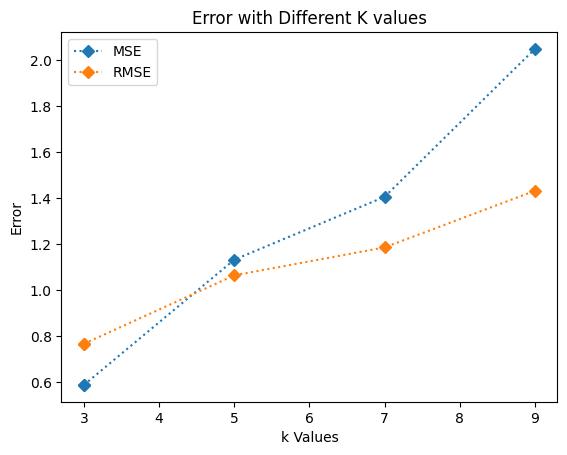

In [58]:
import matplotlib.pyplot as plt

# Select the columns to plot
df_plot = results_KNN_df[['k', 'MSE', 'RMSE']]

# Set the index to be the 'k' column
df_plot = df_plot.set_index('k')

# Plot the data
df_plot.plot(kind='line', linestyle='dotted', marker='D')

# Set the x-axis label
plt.xlabel('k Values')

# Set the y-axis label
plt.ylabel('Error')
plt.title('Error with Different K values')
# Show the plot
plt.show()


<Figure size 2000x1600 with 0 Axes>

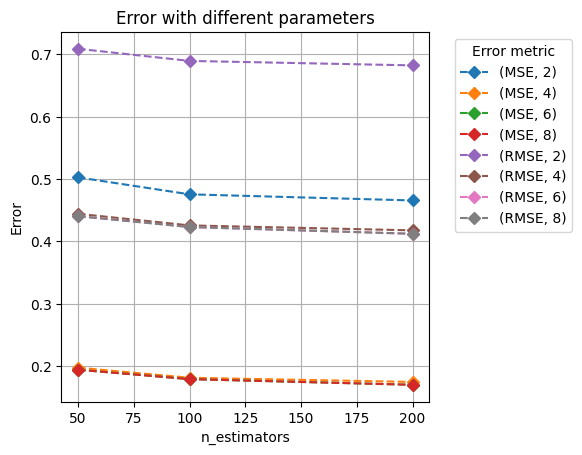

In [59]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20, 16))

# Select the columns to plot
df_plot = results_RF_df[['n_estimators', 'max_depth', 'MSE', 'RMSE']]

# Pivot the max_depth level to columns
df_plot = df_plot.set_index(['n_estimators','max_depth'])[['MSE', 'RMSE']].unstack() #unstack() method to reshape the dataframe so that it can be plotted more easily.  unstack() method to pivot the max_depth level to columns.

# Plot the data
df_plot.plot(kind='line', marker='D', linestyle='--')

# Set the x-axis label
plt.xlabel('n_estimators')

# Set the y-axis label
plt.ylabel('Error')
plt.grid()

# Set the legend title
legend = plt.legend(title='Error metric', loc='best', bbox_to_anchor=(1.05, 1))

# Set the legend outside of the plot
plt.subplots_adjust(right=0.7)
# Set the y-axis limits
#plt.ylim(0.2)
plt.title('Error with different parameters')
# Show the plot
plt.show()


In [60]:
df_finall

,predicted_x,predicted_y,x,y
0,1.731048,2.377667,1.0,2.5
1,1.902714,2.280333,1.5,2.0
2,1.900000,7.500000,1.5,7.5
3,2.436048,2.722000,2.0,2.5
4,2.380214,2.293500,2.5,2.5
5,2.536167,7.500000,2.5,7.5
6,2.648667,1.966000,3.0,1.5
7,3.220000,5.850000,3.0,5.5
8,2.826167,7.400000,3.0,7.5
9,3.767000,3.477333,3.5,3.5


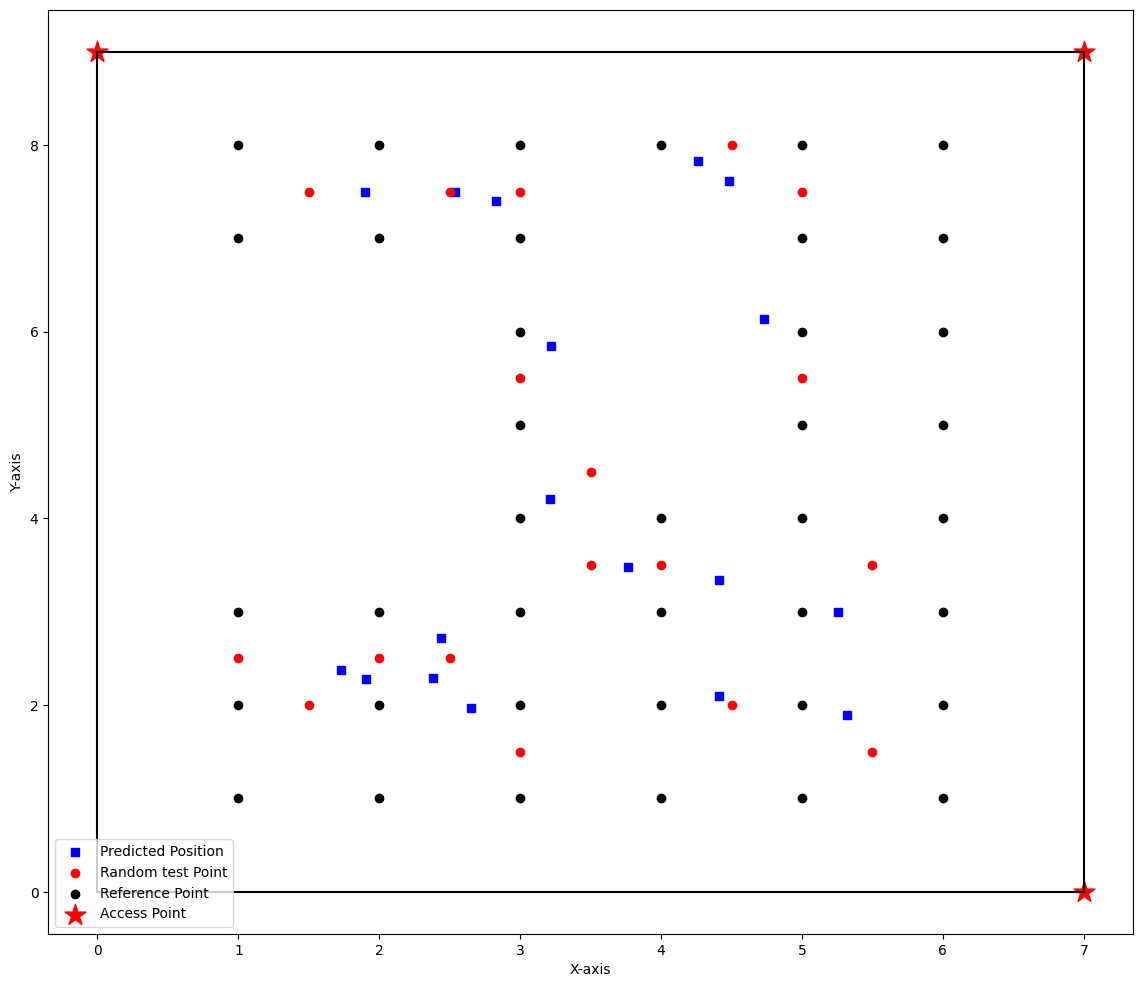

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))

# Set up the room coordinates
x = [0, 7, 7, 0, 0]
y = [0, 0, 9, 9, 0]

# Plot the room as a polygon
plt.plot(x, y, color='black')

plt.scatter(df_finall['predicted_x'], df_finall['predicted_y'], color='blue', marker='s', label='Predicted Position')
plt.scatter(df_finall['x'], df_finall['y'], color='red', label='Random test Point')
plt.scatter(df['x'], df['y'], color='black', label='Reference Point')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
# plt.title('Predicted data scatter with validation data')
plt.legend(loc='best')

# Highlight specific points with a red star symbol
plt.scatter(7, 0, marker='*', color='red', s=250, label='Access Point')
plt.scatter(0, 9, marker='*', color='red', s=250)
plt.scatter(7, 9, marker='*', color='red', s=250)

plt.legend(loc='lower left')

plt.show()


In [62]:
df_finall

,predicted_x,predicted_y,x,y
0,1.731048,2.377667,1.0,2.5
1,1.902714,2.280333,1.5,2.0
2,1.900000,7.500000,1.5,7.5
3,2.436048,2.722000,2.0,2.5
4,2.380214,2.293500,2.5,2.5
5,2.536167,7.500000,2.5,7.5
6,2.648667,1.966000,3.0,1.5
7,3.220000,5.850000,3.0,5.5
8,2.826167,7.400000,3.0,7.5
9,3.767000,3.477333,3.5,3.5


In [63]:
df_finall['x_error']=df_finall['predicted_x']-df_finall['x']


In [64]:
df_finall['y_error']=df_finall['predicted_y']-df_finall['y']

In [65]:
df_finall

,predicted_x,predicted_y,x,y,x_error,y_error
0,1.731048,2.377667,1.0,2.5,0.731048,-0.122333
1,1.902714,2.280333,1.5,2.0,0.402714,0.280333
2,1.900000,7.500000,1.5,7.5,0.400000,0.000000
3,2.436048,2.722000,2.0,2.5,0.436048,0.222000
4,2.380214,2.293500,2.5,2.5,-0.119786,-0.206500
5,2.536167,7.500000,2.5,7.5,0.036167,0.000000
6,2.648667,1.966000,3.0,1.5,-0.351333,0.466000
7,3.220000,5.850000,3.0,5.5,0.220000,0.350000
8,2.826167,7.400000,3.0,7.5,-0.173833,-0.100000
9,3.767000,3.477333,3.5,3.5,0.267000,-0.022667
